In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')


# DATA PREPARATION

### USDX Data

In [ ]:
df_usdx = pd.read_csv("./data/USDX-original.csv", delimiter=',')

In [ ]:
df_usdx.head()

In [5]:
def usdx_analysis(usdx, threshold=0.2):
    """
    USDX check by threshold.
    :param usdx:
    :return:
    """
    if float(str(usdx).strip("%")) >= threshold:
        return 1
    elif float(str(usdx).strip("%")) <= -threshold:
        return -1
    else:
        return 0

In [6]:
for index, row in df_usdx.iterrows():
    df_usdx.at[index,'Result'] = usdx_analysis(row['Change %'], 0.2)

In [7]:
df_usdx.head()

,Date,Price,Open,High,Low,Vol.,Change %,Result
0,"Nov 04, 2019",97.070,97.060,97.155,96.977,-,0.03%,0.0
1,"Nov 01, 2019",97.041,97.110,97.265,96.960,14.89K,-0.12%,0.0
2,"Oct 31, 2019",97.154,97.255,97.255,97.015,17.25K,-0.29%,-1.0
3,"Oct 30, 2019",97.439,97.460,97.800,97.230,16.51K,-0.03%,0.0
4,"Oct 29, 2019",97.469,97.525,97.700,97.380,10.43K,-0.06%,0.0


In [8]:
df_usdx['Result'].value_counts()

 0.0    328
-1.0    199
 1.0    193
Name: Result, dtype: int64

In [9]:
df_usdx.drop(["Price", "Open", "High", "Low", "Vol."], axis=1, inplace=True)

In [10]:
df_usdx

,Date,Change %,Result
0,"Nov 04, 2019",0.03%,0.0
1,"Nov 01, 2019",-0.12%,0.0
2,"Oct 31, 2019",-0.29%,-1.0
3,"Oct 30, 2019",-0.03%,0.0
4,"Oct 29, 2019",-0.06%,0.0
...,...,...,...
715,"Jan 26, 2017",0.36%,1.0
716,"Jan 25, 2017",-0.32%,-1.0
717,"Jan 24, 2017",0.21%,1.0
718,"Jan 23, 2017",-0.56%,-1.0


In [11]:
df_usdx.drop(["Change %"], axis=1, inplace=True)

In [12]:
df_usdx

,Date,Result
0,"Nov 04, 2019",0.0
1,"Nov 01, 2019",0.0
2,"Oct 31, 2019",-1.0
3,"Oct 30, 2019",0.0
4,"Oct 29, 2019",0.0
...,...,...
715,"Jan 26, 2017",1.0
716,"Jan 25, 2017",-1.0
717,"Jan 24, 2017",1.0
718,"Jan 23, 2017",-1.0


### Tweet Data

In [13]:
df_tweet = pd.read_csv("./data/trump_tweets.csv", delimiter=',')
df_tweet.head()
df = df_tweet.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])
df.describe()

,source,text,created_at,retweet_count,favorite_count,is_retweet
count,11859,11859,11857,11857,11857,11799
unique,8,11749,11545,9879,8832,9
top,Twitter for iPhone,MAKE AMERICA GREAT AGAIN!,07-15-2018 13:33:15,16906,0,FALSE
freq,11287,21,5,5,2683,9111


In [14]:
df_nonretweet = df[df['is_retweet'] == 'FALSE']
df_nonretweet.describe()
df_nonretweet.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet
0,Twitter Media Studio,While the Do Nothing Democrats FAIL the Americ...,10-31-2019 22:44:26,30681,103267,FALSE
15,Twitter for iPhone,The Greatest Witch Hunt In American History!,10-31-2019 15:31:46,37849,181124,FALSE
16,Twitter for iPhone,The Impeachment Hoax is hurting our Stock Mark...,10-31-2019 14:57:30,24450,105620,FALSE
17,Twitter for iPhone,....our manufacturers. We should have lower in...,10-31-2019 14:37:45,11956,47363,FALSE
18,Twitter for iPhone,People are VERY disappointed in Jay Powell and...,10-31-2019 14:37:39,14896,59982,FALSE


In [15]:
df_simpler = df_nonretweet.drop(columns=['source', 'is_retweet'])
df_simpler2 = df_simpler
df_simpler2

,text,created_at,retweet_count,favorite_count
0,While the Do Nothing Democrats FAIL the Americ...,10-31-2019 22:44:26,30681,103267
15,The Greatest Witch Hunt In American History!,10-31-2019 15:31:46,37849,181124
16,The Impeachment Hoax is hurting our Stock Mark...,10-31-2019 14:57:30,24450,105620
17,....our manufacturers. We should have lower in...,10-31-2019 14:37:45,11956,47363
18,People are VERY disappointed in Jay Powell and...,10-31-2019 14:37:39,14896,59982
...,...,...,...,...
11854,power from Washington D.C. and giving it back ...,01-20-2017 17:51:58,18362,91143
11855,Today we are not merely transferring power fro...,01-20-2017 17:51:25,20125,109640
11856,It all begins today! I will see you at 11:00 A...,01-20-2017 12:31:53,70523,268372
11857,Thank you for a wonderful evening in Washingto...,01-20-2017 4:24:33,20770,112829


In [16]:
df_simpler2['retweet_count'] = pd.to_numeric(df_simpler2['retweet_count'])
df_simpler2['favorite_count'] = pd.to_numeric(df_simpler2['favorite_count'])
for index, row in df_simpler2.iterrows():
    if df_simpler2.at[index,'favorite_count'] == 0:
        df_simpler2.at[index,'favorite_count'] = 1
    if df_simpler2.at[index,'retweet_count'] == 0:
        df_simpler2.at[index,'retweet_count'] = 1
        
df_simpler2['fav_rt_ratio'] = df_simpler2['favorite_count'].div(df_simpler['retweet_count'])
df_simpler2['rt_fav_ratio'] = df_simpler2['retweet_count'].div(df_simpler['favorite_count'])

df_simpler2.head()

,text,created_at,retweet_count,favorite_count,fav_rt_ratio,rt_fav_ratio
0,While the Do Nothing Democrats FAIL the Americ...,10-31-2019 22:44:26,30681,103267,3.365829,0.297104
15,The Greatest Witch Hunt In American History!,10-31-2019 15:31:46,37849,181124,4.785437,0.208967
16,The Impeachment Hoax is hurting our Stock Mark...,10-31-2019 14:57:30,24450,105620,4.319836,0.231490
17,....our manufacturers. We should have lower in...,10-31-2019 14:37:45,11956,47363,3.961442,0.252433
18,People are VERY disappointed in Jay Powell and...,10-31-2019 14:37:39,14896,59982,4.026719,0.248341


In [17]:
df_simpler2.count()

text              9111
created_at        9111
retweet_count     9111
favorite_count    9111
fav_rt_ratio      9111
rt_fav_ratio      9111
dtype: int64

In [18]:
def is_weekend(date):
    """
    If date is weekend return 1 else return 0
    :param date:
    :return:
    """
    dt = datetime.datetime.strptime(date, "%m-%d-%Y %H:%M:%S").weekday()
    if dt < 5:
        return 0
    return 1

In [19]:
for index, row in df_simpler2.iterrows():
    if is_weekend(str(row['created_at'])):
        df_simpler2.drop(index, inplace=True)

df_simpler2.head()

,text,created_at,retweet_count,favorite_count,fav_rt_ratio,rt_fav_ratio
0,While the Do Nothing Democrats FAIL the Americ...,10-31-2019 22:44:26,30681,103267,3.365829,0.297104
15,The Greatest Witch Hunt In American History!,10-31-2019 15:31:46,37849,181124,4.785437,0.208967
16,The Impeachment Hoax is hurting our Stock Mark...,10-31-2019 14:57:30,24450,105620,4.319836,0.231490
17,....our manufacturers. We should have lower in...,10-31-2019 14:37:45,11956,47363,3.961442,0.252433
18,People are VERY disappointed in Jay Powell and...,10-31-2019 14:37:39,14896,59982,4.026719,0.248341


In [20]:
df_simpler2.count()

text              6876
created_at        6876
retweet_count     6876
favorite_count    6876
fav_rt_ratio      6876
rt_fav_ratio      6876
dtype: int64

In [21]:
df_simpler2['created_at'] = df_simpler2['created_at'].str.split(" ", n = 1, expand = True)[0]
df_simpler2['created_at'] = pd.to_datetime(df_simpler2['created_at'], format='%m-%d-%Y')

C:\Users\John\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


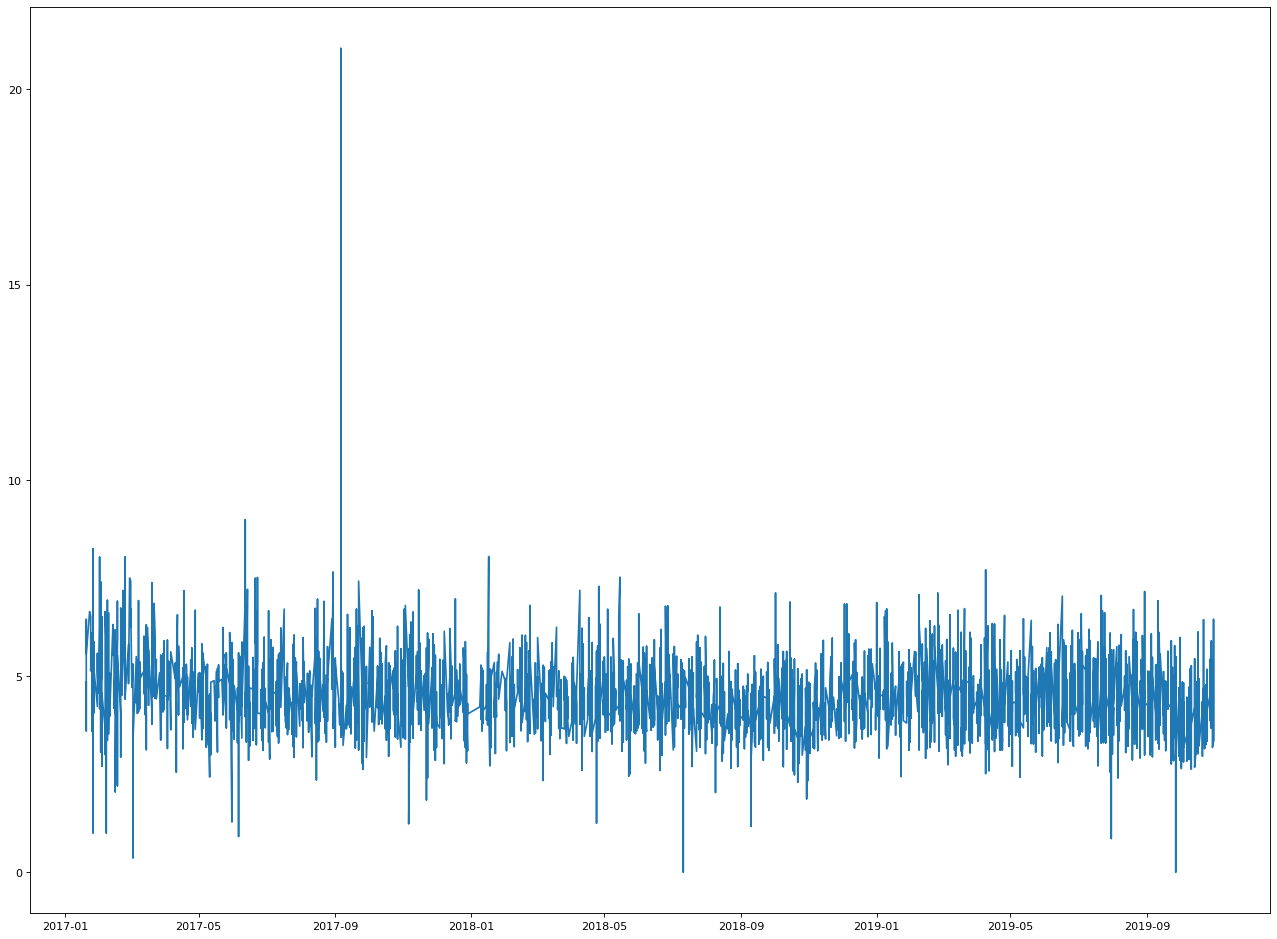

In [22]:
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_simpler2['created_at'], df_simpler2['fav_rt_ratio'])
plt.show()

In [23]:
df_simpler2['fav_rt_ratio'].describe()

count    6876.000000
mean        4.379187
std         0.764742
min         0.000242
25%         3.910116
50%         4.305482
75%         4.772913
max        21.029834
Name: fav_rt_ratio, dtype: float64

In [24]:
df_simpler2['rt_fav_ratio'].describe()

count    6876.000000
mean        1.406468
std        68.667872
min         0.047551
25%         0.209516
50%         0.232262
75%         0.255747
max      4129.000000
Name: rt_fav_ratio, dtype: float64

In [25]:
def rt_fav_threshold(ratio, threshold=1):
    """
    rt-fav ratio check by threshold.
    :param ratio, threshold:
    :return:
    """
    if float(ratio) >= threshold:
        return 1
    else:
        return 0

In [26]:
for index, row in df_simpler2.iterrows():
    df_simpler2.at[index,'rt_fav'] = rt_fav_threshold(row['rt_fav_ratio'], 0.25)

In [27]:
df_simpler2.head()

,text,created_at,retweet_count,favorite_count,fav_rt_ratio,rt_fav_ratio,rt_fav
0,While the Do Nothing Democrats FAIL the Americ...,2019-10-31,30681,103267,3.365829,0.297104,1.0
15,The Greatest Witch Hunt In American History!,2019-10-31,37849,181124,4.785437,0.208967,0.0
16,The Impeachment Hoax is hurting our Stock Mark...,2019-10-31,24450,105620,4.319836,0.231490,0.0
17,....our manufacturers. We should have lower in...,2019-10-31,11956,47363,3.961442,0.252433,1.0
18,People are VERY disappointed in Jay Powell and...,2019-10-31,14896,59982,4.026719,0.248341,0.0


In [28]:
df_simpler2["rt_fav"].value_counts()

0.0    4815
1.0    2061
Name: rt_fav, dtype: int64

In [29]:
df_simpler2.drop(['retweet_count','favorite_count','fav_rt_ratio','rt_fav_ratio'], axis=1, inplace=True)
df_simpler2.head()

,text,created_at,rt_fav
0,While the Do Nothing Democrats FAIL the Americ...,2019-10-31,1.0
15,The Greatest Witch Hunt In American History!,2019-10-31,0.0
16,The Impeachment Hoax is hurting our Stock Mark...,2019-10-31,0.0
17,....our manufacturers. We should have lower in...,2019-10-31,1.0
18,People are VERY disappointed in Jay Powell and...,2019-10-31,0.0


### Merge DataSets

In [30]:
df_usdx.head()

,Date,Result
0,"Nov 04, 2019",0.0
1,"Nov 01, 2019",0.0
2,"Oct 31, 2019",-1.0
3,"Oct 30, 2019",0.0
4,"Oct 29, 2019",0.0


In [31]:
df_usdx['Date'] = pd.to_datetime(df_usdx['Date'], format='%b %d, %Y')
df_usdx.head()

,Date,Result
0,2019-11-04,0.0
1,2019-11-01,0.0
2,2019-10-31,-1.0
3,2019-10-30,0.0
4,2019-10-29,0.0


In [32]:
cols = ['date']
df_simpler2.rename(columns={"created_at": "date"}, inplace=True)
df_usdx.rename(columns={"Date":"date"}, inplace=True)

In [33]:
df_merged = df_simpler2.join(df_usdx.set_index(cols), on=cols)

In [34]:
df_merged

,text,date,rt_fav,Result
0,While the Do Nothing Democrats FAIL the Americ...,2019-10-31,1.0,-1.0
15,The Greatest Witch Hunt In American History!,2019-10-31,0.0,-1.0
16,The Impeachment Hoax is hurting our Stock Mark...,2019-10-31,0.0,-1.0
17,....our manufacturers. We should have lower in...,2019-10-31,1.0,-1.0
18,People are VERY disappointed in Jay Powell and...,2019-10-31,0.0,-1.0
...,...,...,...,...
11854,power from Washington D.C. and giving it back ...,2017-01-20,0.0,-1.0
11855,Today we are not merely transferring power fro...,2017-01-20,0.0,-1.0
11856,It all begins today! I will see you at 11:00 A...,2017-01-20,1.0,-1.0
11857,Thank you for a wonderful evening in Washingto...,2017-01-20,0.0,-1.0


In [35]:
df_merged2 = df_merged.dropna(axis='rows')
df_merged2 = df_merged2.reset_index(drop=True)

In [36]:
df_merged2

,text,date,rt_fav,Result
0,While the Do Nothing Democrats FAIL the Americ...,2019-10-31,1.0,-1.0
1,The Greatest Witch Hunt In American History!,2019-10-31,0.0,-1.0
2,The Impeachment Hoax is hurting our Stock Mark...,2019-10-31,0.0,-1.0
3,....our manufacturers. We should have lower in...,2019-10-31,1.0,-1.0
4,People are VERY disappointed in Jay Powell and...,2019-10-31,0.0,-1.0
...,...,...,...,...
6838,power from Washington D.C. and giving it back ...,2017-01-20,0.0,-1.0
6839,Today we are not merely transferring power fro...,2017-01-20,0.0,-1.0
6840,It all begins today! I will see you at 11:00 A...,2017-01-20,1.0,-1.0
6841,Thank you for a wonderful evening in Washingto...,2017-01-20,0.0,-1.0


In [37]:
df_merged2['Result'] = pd.to_numeric(df_merged2['Result'])
df_merged2

,text,date,rt_fav,Result
0,While the Do Nothing Democrats FAIL the Americ...,2019-10-31,1.0,-1.0
1,The Greatest Witch Hunt In American History!,2019-10-31,0.0,-1.0
2,The Impeachment Hoax is hurting our Stock Mark...,2019-10-31,0.0,-1.0
3,....our manufacturers. We should have lower in...,2019-10-31,1.0,-1.0
4,People are VERY disappointed in Jay Powell and...,2019-10-31,0.0,-1.0
...,...,...,...,...
6838,power from Washington D.C. and giving it back ...,2017-01-20,0.0,-1.0
6839,Today we are not merely transferring power fro...,2017-01-20,0.0,-1.0
6840,It all begins today! I will see you at 11:00 A...,2017-01-20,1.0,-1.0
6841,Thank you for a wonderful evening in Washingto...,2017-01-20,0.0,-1.0


In [38]:
STOP_WORD_LIST = [ "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "you're", "youre", "you re", "you've", "youve", "you ve", "you'll", "youll", "you ll", "youd", "you'd", "you d", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "she s", "she's", "her", "hers", "herself", "it", "it s", "it's", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "that'll", "thatll", "that ll", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "dont", "don't", "don t", "should", "shouldve", "should ve", "should've", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "arent", "aren t", "aren't", "couldn", "couldnt", "couldn t", "couldn't", "didn", "didnt", "didn t", "didn't", "doesn", "doesnt", "doesn t", "doesn't", "hadn", "hadnt", "hadn t", "hadn't", "hasn", "hasnt", "hasn t", "hasn't", "haven", "havent", "haven t", "haven't", "isn", "isnt", "isn t", "isn't", "ma", "mightn", "mightnt", "mightn t", "mightn't", "mustn", "mustnt", "mustn t", "mustn't", "needn", "neednt", "needn t", "needn't", "shan", "shant", "shan t", "shan't", "shouldn", "shouldnt", "shouldn t", "shouldn't", "wasn", "wasnt", "wasn t", "wasn't", "werent", "weren t", "weren", "weren't", "won", "wont", "won t", "won't", "wouldn", "wouldnt", "wouldn t", "wouldn't"]

### Further changes on merged data

In [39]:
#Generate the vocab
vocab = []
for line in df_merged2['text']:
    words = line.split()
    for word in words:
        toAppend = word.lower().strip(')').strip('(').strip(',').strip('!').strip(':').strip('?').strip('”').strip('“').strip('’').strip('.').strip('!!').strip(')').strip('!')
        if toAppend not in vocab:
            if toAppend not in STOP_WORD_LIST:
                if 'http' not in toAppend:
                    if '...' not in toAppend:
                        if len(toAppend) != 1:
                            if '&amp' not in toAppend:
                                vocab.append(toAppend)   
            

In [40]:
index_count = len(df_merged2['text'])
col_count = len(vocab)
print(index_count, col_count)


6843 11908


In [41]:
#df_vector = pd.DataFrame(index=np.arange(6843), columns=np.arange(11908))
df_vector2 = pd.DataFrame(index=np.arange(6843), columns = vocab)

In [42]:
df_vector2

,nothing,democrats,fail,american,people,continue,impeachment,scam,administration,deliver,...,mountain,american!#inaugurationday,rulers,controls,#inaugurationday,transferring,swearing-in,#inauguration,tonight-,am…
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_vector2.head()

,nothing,democrats,fail,american,people,continue,impeachment,scam,administration,deliver,...,mountain,american!#inaugurationday,rulers,controls,#inaugurationday,transferring,swearing-in,#inauguration,tonight-,am…
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#for j in range(len(df_merged2['text'])):
#    df_vector2 = df_vector2.append(pd.Series(), ignore_index=True)
#    print(str(j) + "/" + str(len(df_merged2['text'])), end="\r", flush=True)
i = 0
df_vector2['usdx'] = 0
df_vector2['rt_fav'] = 0
for line in df_merged2['text']:
    words = line.split()
    for word in words:
        toAppend = word.lower().strip(')').strip('(').strip(',').strip('!').strip(':').strip('?').strip('”').strip('“').strip('’').strip('.').strip('!!').strip(')').strip('!')
        if toAppend in vocab:
            df_vector2.iloc[i, df_vector2.columns.get_loc(toAppend)] = 1
    df_vector2.iloc[i, df_vector2.columns.get_loc('usdx')] = df_merged2.iloc[i, df_merged2.columns.get_loc('Result')]
    df_vector2.iloc[i, df_vector2.columns.get_loc('rt_fav')] = df_merged2.iloc[i, df_merged2.columns.get_loc('rt_fav')]
    print(str(i) + "/" + str(len(df_merged2['text'])), end="\r", flush=True)
    i += 1

df_vector2 = df_vector2.fillna(0)

In [45]:
df_vector2

,nothing,democrats,fail,american,people,continue,impeachment,scam,administration,deliver,...,rulers,controls,#inaugurationday,transferring,swearing-in,#inauguration,tonight-,am…,usdx,rt_fav
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,-1.0,1.0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.0,0.0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-1.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.0,1.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1.0,0.0
6839,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,-1.0,0.0
6840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-1.0,1.0
6841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-1.0,0.0


In [46]:
def is_url_in_tweet(tweet):
    """
    If tweet contains http then return 1
    :param tweet:
    :return:
    """
    tweet = str(tweet)
    if "http" in tweet:
        return 1
    return 0

In [47]:
def capital_word_ratio(tweet):
    """
    Returns capital_count / total_word_count
    :param tweet:
    :return:
    """
    tweet = str(tweet)
    words = tweet.split()
    word_count = len(words)
    capital_count = 0
    for word in words:
        if word.isupper():
            capital_count += 1

    return capital_count / word_count

In [48]:
df_vector2['Capitals_Ratio'] = 0
df_vector2['URI_Included'] = 0

In [49]:
df_vector2.head()

,nothing,democrats,fail,american,people,continue,impeachment,scam,administration,deliver,...,#inaugurationday,transferring,swearing-in,#inauguration,tonight-,am…,usdx,rt_fav,Capitals_Ratio,URI_Included
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,-1.0,1.0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.0,0.0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,-1.0,0.0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.0,1.0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-1.0,0.0,0,0


In [50]:
i = 0
for line in df_merged2['text']:
    df_vector2.iloc[i, df_vector2.columns.get_loc('Capitals_Ratio')] = capital_word_ratio(str(line))
    df_vector2.iloc[i, df_vector2.columns.get_loc('URI_Included')] = is_url_in_tweet(str(line))
    print(str(i) + "/" + str(len(df_merged2['text'])), end="\r", flush=True)
    i += 1

In [51]:
df_vector2.head()

,nothing,democrats,fail,american,people,continue,impeachment,scam,administration,deliver,...,#inaugurationday,transferring,swearing-in,#inauguration,tonight-,am…,usdx,rt_fav,Capitals_Ratio,URI_Included
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,-1.0,1.0,0.100000,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.0,0.0,0.000000,0
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,-1.0,0.0,0.000000,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.0,1.0,0.000000,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-1.0,0.0,0.020408,0


In [52]:
from textblob import TextBlob

In [53]:
def sentiment_analysis(tweet):
    tweet = str(tweet)
    blob = TextBlob(tweet)

    if blob.sentiment.polarity > 0:
        return 1
    elif blob.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [57]:
#df_tweet = pd.read_csv("trump_tweets.csv", delimiter=",")
#tweets = df_merged2["text"]
sentiment_list = []
df_vector2['Sentiment_Result'] = 0
i = 0
for tweet in df_merged2["text"]:
    sentiment = sentiment_analysis(tweet)
    df_vector2.iloc[i, df_vector2.columns.get_loc('Sentiment_Result')] = sentiment
    print(str(i) + "/" + str(len(df_merged2['text'])), end="\r", flush=True)
    i +=1 


In [59]:
df_vector2.head()

,nothing,democrats,fail,american,people,continue,impeachment,scam,administration,deliver,...,transferring,swearing-in,#inauguration,tonight-,am…,usdx,rt_fav,Capitals_Ratio,URI_Included,Sentiment_Result
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,-1.0,1.0,0.100000,1,-1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,-1.0,0.0,0.000000,0,1
2,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-1.0,0.0,0.000000,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.0,1.0,0.000000,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,-1.0,0.0,0.020408,0,-1


In [60]:
df_vector2.to_csv("result_trump_tweets.csv")

# Machine Learning Algorithms

## Gaussian Naive Bayes

In [2]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
from sklearn.model_selection import train_test_split
df_all = pd.read_csv("result_trump_tweets.csv", delimiter=',')
df_all.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df_all = df_all.astype(int)

In [5]:
df_y = df_all['usdx']
df_X = df_all.drop(columns=['usdx'])
X_train_orig, X_test, y_train_orig, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [6]:
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=42)
df_labels = y_train
df_features = X_train
df_features_test = X_test_valid
df_labels_test = y_test_valid

In [7]:
def print_prediction_stats(actual, prediction):
    correct = 0
    assert(len(actual) == len(prediction))
    for i in range(len(actual)):
        if actual.iloc[i] == prediction[i]:
            correct += 1
    print("Total predictions made:\t", len(actual))
    print("Correct predictions: \t", correct)
    print("Wrong predictions:   \t", len(actual) - correct)

In [8]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    assert(len(actual) == len(predicted))
    for i in range(len(actual)):
        if actual.iloc[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [178]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(df_features,df_labels)

#Predict Output
predicted= model.predict(df_features_test) # 0:Overcast, 2:Mild

print("Accuracy:",metrics.accuracy_score(df_labels_test, predicted))
print_prediction_stats(df_labels_test, predicted)

Accuracy: 0.3689497716894977
Total predictions made:	 1095
Correct predictions: 	 404
Wrong predictions:   	 691


## Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd


In [149]:
lr = LogisticRegression()
lr.fit(df_features, df_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
y_pred = lr.predict(df_features_test)

In [151]:
confusion_matrix(df_labels_test, y_pred)

array([[ 74, 184,  44],
       [ 66, 377,  71],
       [ 47, 171,  61]], dtype=int64)

In [154]:
print("Accuracy:",metrics.accuracy_score(df_labels_test, y_pred))
print_prediction_stats(df_labels_test, y_pred)

Accuracy: 0.46757990867579907
Total predictions made:	 1095
Correct predictions: 	 512
Wrong predictions:   	 583


In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


C_param_range = [0.001,0.01,0.1,1,10,100]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i, random_state = 0)
    lr.fit(df_features, df_labels)
    
    # Predict using model
    y_pred = lr.predict(df_features_test)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(df_labels_test, y_pred)
    j += 1
    
    # Printing decision regions

print(sepal_acc_table)

   C_parameter  Accuracy
0        0.001  0.469406
1        0.010   0.47032
2        0.100  0.483105
3        1.000   0.46758
4       10.000  0.443836
5      100.000  0.418265


## SGD Classifier

In [181]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
from sklearn.preprocessing import label_binarize

#df_labels = label_binarize(df_labels, classes=[-1, 0, 1])
#df_labels_test = label_binarize(df_labels_test, classes=[-1, 0, 1])

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           df_features, df_labels, df_features_test, df_labels_test)

print(bestModel, bestScore)


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    9.5s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    9.6s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:   10.4s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:   10.8s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:   11.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.2s


ValueError: multiclass format is not supported

In [202]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

numFolds = 10
kf = KFold(numFolds, shuffle=True)

# These are "Class objects". For each Class, find the AUC through
# 10 fold cross validation.
Model = SGDClassifier

# Added max_iter here
params = []
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
param = { 
               "loss": "log", 
               "penalty": "l2", 
               'max_iter':1000
        }
for alpha in alphas:
    param['alpha'] = alpha
    params.append(param)


list(itertools.product(a, b))

for param in params:
    total = 0
    for train_indices, test_indices in kf.split(X_train_orig):
        train_X = X_train_orig.values[train_indices, :]; train_Y = y_train_orig.values[train_indices]
        test_X = X_train_orig.values[test_indices, :]; test_Y = y_train_orig.values[test_indices]
        reg = Model(**param)
        reg.fit(train_X, train_Y)
        predictions = reg.predict(test_X)
        total += accuracy_score(test_Y, predictions)

    accuracy = total / numFolds
    print("Accuracy score of {0} with Alpha{2}: {1}".format(Model.__name__, accuracy, param['alpha']))


Accuracy score of LogisticRegression: 0.44866858378147567
Accuracy score of SGDClassifier: 0.43441699248722304


### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 60, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 1100, 2000]}


In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 4, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(df_features, df_labels)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:  8.3min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:  8.9min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.0min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [12]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [13]:
rf_random.best_score_

0.48412879652888785